# Reinforcement Learning, part 3: Dealing with Non-Markov environments

Here we present a problem analogous to that faced by Redish (2004): The problem of credit assignment in a non-Markov environment.

In [63]:
#

## Non-markov problem
##
##          A          Win 1.0
##        /   \      /
##  start      middle
##        \   /      \ 
##          B          Loss -1.0
##

import random
import numpy as np
import matplotlib.pyplot as plt

# Reward functio

R = {"start" :  0,
     "A" : 0,
     "B" : 0,
     "middle" : 0,
     "win" : 1.0,
     "loss" : -1.0,
     None : 0.0
}

# State transition probavility function
#
def PSS(history):
    s_current = history[-1]
    s_next = None
    
    if s_current is "start":
        coin = random.uniform(0, 1)
        if coin <= 0.5:
            s_next = "A"
        else:
            s_next = "B"
        
    elif s_current is "A" or s_current is "B":
        s_next = "middle"

    elif s_current is "middle":
        s_previous = history[-2]
        if s_previous is "A":
            s_next = "win"
        elif s_previous is "B":
            s_next = "loss"
        
    elif s_current is "win" or s_current is "loss":
        s_next = None

    return (s_next, R[s_current])
    

## The agent just passively experiences a set of states 
class Agent:
    def __init__(self, states = R.keys(), alpha = 0.1, gamma = 0.9):
        self.V = {}

        # Inits all state values to zero
        for s in states:
            self.V[s] = 0.0

        # sets the two parameters
        self.alpha = alpha
        self.gamma = gamma
        
    def learnV(self, state1, state2, reward2):
        #print("state %s, reward %.2f" % (s_now, r))
        a = self.alpha
        g = self.gamma
        rpe = reward2 + g * self.V[state2] - self.V[state1]
        self.V[state1] += a * rpe
        
    def visualizeV(self, title="V-table"):
        states = ("start", "A", "B", "middle", "win", "loss")
        values = [self.V[state] for state in states]
        
        fig, ax = plt.subplots()
        ax.axis([-0.5, 5.5, -1.1, 1.1])
        x = np.arange(len(states))
        ax.set_xticks(x)
        ax.set_xticklabels(states)
        ax.set_ylabel("Value V")
        ax.set_xlabel("States")
        ax.bar(x, values)
        ax.set_title(title)
        plt.show()
        

Testing the agent cannot solve the problem

In [64]:
def run(agent, n = 1000):
    for i in range(n):
        history = ["start"]

        while PSS(history)[0] is not None:
            s_now = history[-1]
            s_next, r = PSS(history)
            history.append(s_next)
            agent.learnV(s_now, s_next, r)

        s_now = history[-1]
        s_next, r = PSS(history)
        history.append(s_next)
        agent.learnV(s_now, s_next, r)

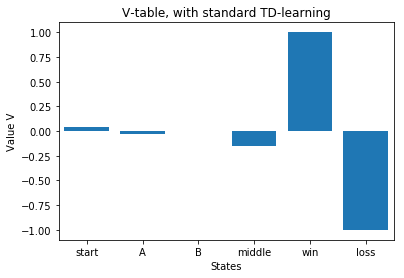

In [68]:
a = Agent()
run(a, 1000)
a.visualizeV("V-table, with standard TD-learning")

## The solution: Eligibility traces

In [69]:

## The agent just experiences a set of 
class Agent:
    def __init__(self, states = R.keys(), alpha = 0.1,
                 gamma = 0.9, lmbda = 0.9):
        self.V = {}
        self.E = {}
        
        # Inits all state values to zero
        for s in states:
            self.E[s] = 0.0
            self.V[s] = 0.0

        # sets the three parameters
        self.alpha = alpha
        self.gamma = gamma
        self.lmbda = lmbda
    
        
    def learnV(self, s_now, s_next, r):
        """Learns a V-table with TD(lambda)"""
        #print("state %s, reward %.2f" % (s_now, r))
        a = self.alpha
        g = self.gamma
        l = self.lmbda
        rpe = r + g * self.V[s_next] - self.V[s_now]
        
        # First, update the trace vector
        for s in self.E.keys():
            self.E[s] *= (l * g)
            if s == s_now:
                 self.E[s] += 1

        # Second, update the V table
        for s in self.E.keys():
            self.V[s] += a * rpe * self.E[s]
            
            
    def visualizeV(self, title="V-table"):
        states = ("start", "A", "B", "middle", "win", "loss")
        values = [self.V[state] for state in states]
        
        fig, ax = plt.subplots()
        ax.axis([-0.5, 5.5, -1.0, 1.0])
        x = np.arange(len(states))
        ax.set_xticks(x)
        ax.set_xticklabels(states)
        ax.set_ylabel("Value V")
        ax.set_xlabel("States")
        ax.bar(x, values)
        ax.set_title(title)
        plt.show()

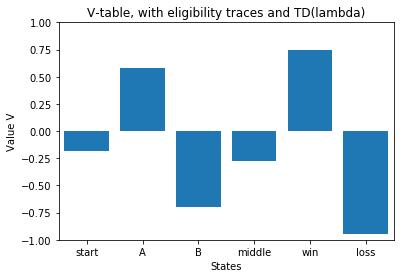

In [74]:
a = Agent()
run(a, 10000)
a.visualizeV("V-table, with eligibility traces and TD(lambda)")